In [1]:
import pandas as pd
import lightgbm as lgb
import xgboost as xgb
import matplotlib.pyplot as plt

In [4]:
df1 = pd.read_csv('features/Fingerprints/Train/All_fingerprints_train_RRCK.csv')
df2 = pd.read_csv('features/Descriptors/Train_2d_Mordred_desc_RRCK.csv')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000654 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3458
[LightGBM] [Info] Number of data points in the train set: 140, number of used features: 802
[LightGBM] [Info] Start training from score -5.537857
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

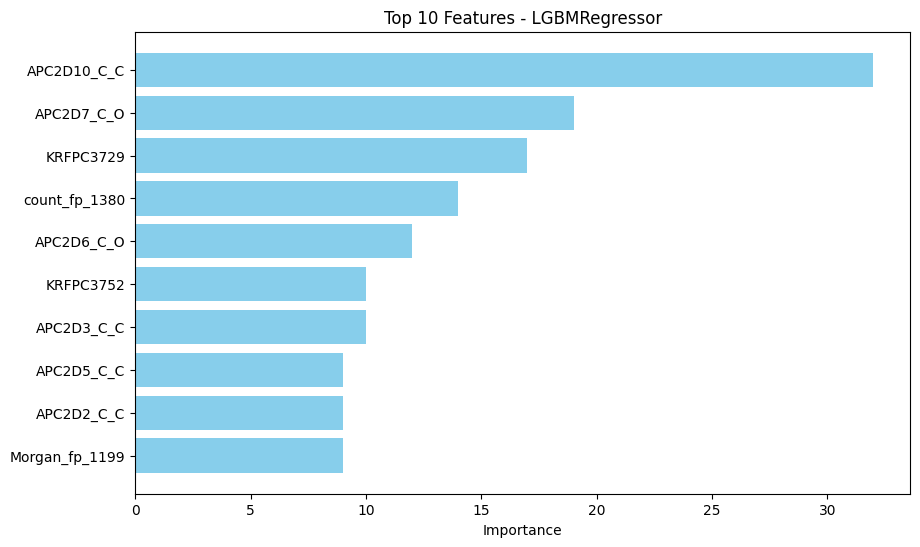

In [5]:
X_train_1 = df1.drop(columns=['ID', 'SMILES', 'Permeability'])
y_train_1 = df1['Permeability']

lgb_model = lgb.LGBMRegressor()
lgb_model.fit(X_train_1, y_train_1)

lgb_importance = lgb_model.feature_importances_
lgb_feature_importance_df = pd.DataFrame({'Feature': X_train_1.columns, 'Importance': lgb_importance})
lgb_top_features = lgb_feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(lgb_top_features['Feature'], lgb_top_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 10 Features - LGBMRegressor')
plt.gca().invert_yaxis()
plt.show()

In [7]:
lgb_feature_importance_df.to_csv('results/Fingerprints/Important_fingerprints_RRCK.csv')

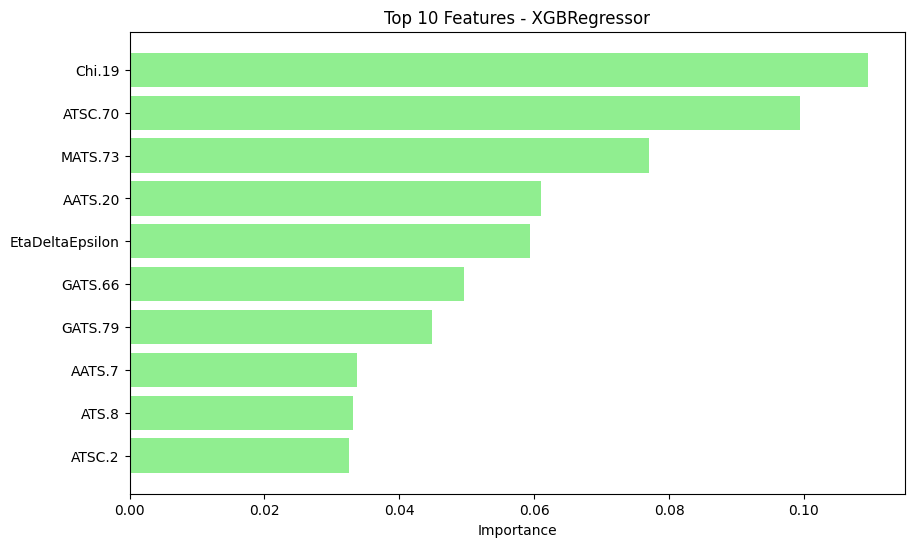

In [8]:
X_train_2 = df2.drop(columns=['ID', 'SMILES', 'Permeability'])
X_train_2 = X_train_2.select_dtypes(include=['number'])
y_train_2 = df2['Permeability']

xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train_2, y_train_2)

xgb_importance = xgb_model.feature_importances_
xgb_feature_importance_df = pd.DataFrame({'Feature': X_train_2.columns, 'Importance': xgb_importance})
xgb_top_features = xgb_feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(xgb_top_features['Feature'], xgb_top_features['Importance'], color='lightgreen')
plt.xlabel('Importance')
plt.title('Top 10 Features - XGBRegressor')
plt.gca().invert_yaxis()
plt.show()


In [9]:
xgb_feature_importance_df.to_csv('results/Descriptors/Important_descriptors_RRCK.csv')

In [10]:
print("Top 10 Features - LGBMRegressor:")
print(lgb_top_features)

print("\nTop 10 Features - XGBRegressor:")
print(xgb_top_features)

Top 10 Features - LGBMRegressor:
              Feature  Importance
5578      APC2D10_C_C          32
5346       APC2D7_C_O          19
16450       KRFPC3729          17
3428    count_fp_1380          14
5268       APC2D6_C_O          12
16473       KRFPC3752          10
5032       APC2D3_C_C          10
5188       APC2D5_C_C           9
4954       APC2D2_C_C           9
1199   Morgan_fp_1199           9

Top 10 Features - XGBRegressor:
              Feature  Importance
810            Chi.19    0.109448
301           ATSC.70    0.099370
520           MATS.73    0.076958
152           AATS.20    0.060969
1078  EtaDeltaEpsilon    0.059357
609           GATS.66    0.049554
622           GATS.79    0.044846
139            AATS.7    0.033656
41              ATS.8    0.033121
233            ATSC.2    0.032474


In [11]:
def combine_top_features(df1, df2, lgb_top_features, xgb_top_features):
   
    common_cols = ['ID', 'SMILES', 'Permeability']
    df1_selected = df1[common_cols + [col for col in lgb_top_features if col in df1.columns]]
    df2_selected = df2[common_cols + [col for col in xgb_top_features if col in df2.columns]]
    combined_df = pd.merge(df1_selected, df2_selected, on=common_cols, how='inner', suffixes=('_lgb', '_xgb'))
    return combined_df

In [12]:
combined_df = combine_top_features(df1, df2, lgb_top_features['Feature'].tolist(), xgb_top_features['Feature'].tolist())
combined_df.head(10)

,ID,SMILES,Permeability,APC2D10_C_C,APC2D7_C_O,KRFPC3729,count_fp_1380,APC2D6_C_O,KRFPC3752,APC2D3_C_C,...,Chi.19,ATSC.70,MATS.73,AATS.20,EtaDeltaEpsilon,GATS.66,GATS.79,AATS.7,ATS.8,ATSC.2
0,2358,C/C=C/C[C@@H](C)[C@@H](O)[C@H]1C(=O)N[C@@H](C(...,-6.13,106.0,58.0,11.0,11,43.0,13.0,77.0,...,26.864399,-6.852774,0.162880,2.519214,0.107873,0.897886,1.190181,2.004817,2280.0,-0.503471
1,2359,C/C=C/C[C@@H](C)C(=O)[C@H]1C(=O)N[C@@H](C(C)C)...,-6.66,106.0,58.0,11.0,11,43.0,13.0,77.0,...,26.864399,-6.785173,0.168720,2.534929,0.110321,0.897826,1.200832,2.077679,2303.0,-0.518923
2,2357,C/C=C/C[C@@H](C)[C@@H](O)[C@H]1C(=O)N[C@@H](CC...,-5.95,100.0,56.0,11.0,11,43.0,13.0,76.0,...,26.275090,-7.405559,0.160963,2.533227,0.109524,0.899436,1.152283,2.018793,2247.0,-0.497014
3,2360,C/C=C/C[C@@H](C)[C@H]1OC(=O)[C@H](C(C)C)N(C)C(...,-6.78,107.0,50.0,11.0,11,41.0,11.0,75.0,...,25.321192,-7.244472,0.171310,2.548214,0.109524,0.906211,1.067041,2.021255,2171.0,-0.512212
4,2353,C/C=C/C[C@@H](C)[C@@H](O)[C@H]1C(=O)N[C@@H](C)...,-5.87,94.0,54.0,11.0,11,43.0,13.0,75.0,...,26.149611,-7.967446,0.160968,2.552478,0.111226,0.907271,1.113852,2.033537,2214.0,-0.482504
5,1884,CCCC[C@H]1C(=O)N(C)[C@H](CC)C(=O)N(C)[C@H](CCC...,-6.10,103.0,57.0,9.0,12,42.0,23.0,83.0,...,26.981590,-7.676496,0.130528,2.483604,0.110296,0.856773,1.161468,2.081489,2311.0,-0.673625
6,2355,CC[C@@H]1NC(=O)[C@H](CC(C)C)N(C)C(=O)[C@H](C(C...,-5.75,89.0,49.0,10.0,11,38.0,13.0,72.0,...,24.855416,-8.051766,0.175010,2.505571,0.107270,0.898848,1.084627,1.884655,2064.0,-0.415890
7,2354,CC[C@@H]1NC(=O)[C@H](CC(C)C)N(C)C(=O)[C@H](CC)...,-5.57,85.0,48.0,10.0,11,38.0,13.0,71.0,...,24.019496,-8.319370,0.173045,2.519875,0.109009,0.900469,1.073315,1.899364,2035.0,-0.408998
8,1883,CCCC[C@H]1C(=O)N(C)[C@H](CC)C(=O)N(C)[C@H](C)C...,-5.85,88.0,54.0,6.0,12,39.0,23.0,79.0,...,26.931540,-6.688206,0.128269,2.555214,0.118030,0.874262,1.136242,2.117137,2187.0,-0.652564
9,5667,CCCC[C@@H]1NC(=O)[C@H](CCCC)N(C)C(=O)[C@H](CCC...,-6.46,112.0,45.0,10.0,10,38.0,6.0,67.0,...,16.081324,-8.212108,0.160443,2.571691,0.113781,0.897064,1.137740,2.715562,2084.0,-0.172990


In [13]:
combined_df.shape

(140, 23)

In [14]:
df1_test = pd.read_csv('features/Fingerprints/Test/All_fingerprints_test_RRCK.csv')
df2_test = pd.read_csv('features/Descriptors/Test_2d_Mordred_desc_RRCK.csv')

In [15]:
combined_test_df = combine_top_features(df1_test, df2_test, lgb_top_features['Feature'].tolist(), xgb_top_features['Feature'].tolist())
combined_test_df.head(10)

,ID,SMILES,Permeability,APC2D10_C_C,APC2D7_C_O,KRFPC3729,count_fp_1380,APC2D6_C_O,KRFPC3752,APC2D3_C_C,...,Chi.19,ATSC.70,MATS.73,AATS.20,EtaDeltaEpsilon,GATS.66,GATS.79,AATS.7,ATS.8,ATSC.2
0,2352,C/C=C/C[C@@H](C)[C@@H](O)[C@H]1C(=O)N[C@@H]([C...,-6.34,100.0,59.0,11.0,11,45.0,13.0,76.0,...,26.864399,-5.186969,0.148502,2.585145,0.114213,0.913144,1.157217,2.134314,2344.000000,-0.538016
1,5669,C/C=C/C[C@@H](C)[C@@H](O)[C@H]1C(=O)N[C@@H](CC...,-5.76,100.0,56.0,11.0,11,43.0,13.0,76.0,...,26.275090,-7.405559,0.160963,2.533227,0.109524,0.899436,1.152283,2.018793,2247.000000,-0.497014
2,1881,CCCC[C@H]1C(=O)N(C)[C@H](CCCC)C(=O)N(C)[C@H](C...,-8.00,121.0,55.0,13.0,11,43.0,21.0,81.0,...,24.218730,-8.246325,0.130705,2.399395,0.100837,0.838128,1.175387,2.083083,2321.000000,-0.622898
3,5666,CCCC[C@@H]1NC(=O)[C@H](CCCC)NC(=O)[C@H](CCCC)N...,-6.46,103.0,43.0,12.0,9,36.0,6.0,62.0,...,15.475376,-8.296930,0.166433,2.503921,0.109137,0.881767,1.133136,2.460452,1893.333333,-0.163659
4,1877,CCCC[C@H]1C(=O)N(C)[C@H](CCCC)C(=O)N(C)[C@H](C...,-8.00,109.0,50.0,12.0,10,39.0,19.0,73.0,...,21.624278,-7.553892,0.128839,2.405751,0.101346,0.838384,1.178779,2.126966,2107.000000,-0.545293
5,1873,CC(C)C[C@H]1C(=O)N(C)[C@H](CC(C)C)C(=O)N2CCC[C...,-4.62,93.0,43.0,10.0,10,37.0,19.0,69.0,...,22.411354,-6.372154,0.137745,2.498943,0.109395,0.894092,1.049180,2.123957,1995.000000,-0.483505
6,1878,CCC[C@H]1C(=O)N(C)[C@H](CC)C(=O)N(C)[C@@H](C)C...,-7.30,72.0,47.0,3.0,11,33.0,21.0,68.0,...,24.258854,-5.450591,0.122560,2.653034,0.128311,0.898415,1.125225,2.250996,1914.000000,-0.555494
7,1849,O=C1CN(CCCc2ccccc2)C(=O)[C@H]2CCCN2C(=O)[C@H](...,-5.92,113.0,40.0,4.0,11,26.0,8.0,67.0,...,12.458942,-4.631319,0.110996,2.761157,0.122455,0.939340,1.338857,3.942308,2326.000000,-0.113621
8,1856,CC(C)(C)C[C@@H]1NC(=O)[C@@H](Cc2ccccc2)NC(=O)[...,-5.12,103.0,36.0,5.0,13,28.0,8.0,56.0,...,14.478511,-7.865086,0.082558,3.096349,0.169591,0.933470,0.845000,4.133472,2367.333333,0.008566
9,2367,CC[C@H](C)[C@@H]1NC(=O)[C@H](Cc2ccc(O)cc2)N(C)...,-6.93,101.0,42.0,5.0,11,33.0,10.0,63.0,...,16.560433,-7.125537,0.125399,2.767635,0.128570,0.912407,1.049031,3.280342,2117.000000,-0.199703


In [16]:
combined_test_df.shape

(36, 23)

In [17]:
def add_label_column(df):
    df = df.copy()
    df['Label'] = (df['Permeability'] >= -6).astype(int)
    return df

In [18]:
combined_train_df_labeled = add_label_column(combined_df)
combined_test_df_labeled = add_label_column(combined_test_df)
print(combined_train_df_labeled.head(10))
print(combined_test_df_labeled.head(10))

     ID                                             SMILES  Permeability  \
0  2358  C/C=C/C[C@@H](C)[C@@H](O)[C@H]1C(=O)N[C@@H](C(...         -6.13   
1  2359  C/C=C/C[C@@H](C)C(=O)[C@H]1C(=O)N[C@@H](C(C)C)...         -6.66   
2  2357  C/C=C/C[C@@H](C)[C@@H](O)[C@H]1C(=O)N[C@@H](CC...         -5.95   
3  2360  C/C=C/C[C@@H](C)[C@H]1OC(=O)[C@H](C(C)C)N(C)C(...         -6.78   
4  2353  C/C=C/C[C@@H](C)[C@@H](O)[C@H]1C(=O)N[C@@H](C)...         -5.87   
5  1884  CCCC[C@H]1C(=O)N(C)[C@H](CC)C(=O)N(C)[C@H](CCC...         -6.10   
6  2355  CC[C@@H]1NC(=O)[C@H](CC(C)C)N(C)C(=O)[C@H](C(C...         -5.75   
7  2354  CC[C@@H]1NC(=O)[C@H](CC(C)C)N(C)C(=O)[C@H](CC)...         -5.57   
8  1883  CCCC[C@H]1C(=O)N(C)[C@H](CC)C(=O)N(C)[C@H](C)C...         -5.85   
9  5667  CCCC[C@@H]1NC(=O)[C@H](CCCC)N(C)C(=O)[C@H](CCC...         -6.46   

   APC2D10_C_C  APC2D7_C_O  KRFPC3729  count_fp_1380  APC2D6_C_O  KRFPC3752  \
0        106.0        58.0       11.0             11        43.0       13.0   
1    

In [19]:
combined_train_df_labeled.to_csv('data/Train_important_features_RRCK.csv', index=False)
combined_test_df_labeled.to_csv('data/Test_important_features_RRCK.csv', index=False)

In [19]:
!pip install seaborn


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib.cm import ScalarMappable
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy import stats

In [22]:
def correlation_heatmaps_diff_labels(df, label_col='Label', feature_cols=None):
  
    if feature_cols is None:
        feature_cols = [col for col in df.columns if col not in ['ID', 'SMILES', 'Permeability', label_col]]

    df_label_0 = df[df[label_col] == 0][feature_cols]
    df_label_1 = df[df[label_col] == 1][feature_cols]

    corr_0 = df_label_0.corr()
    corr_1 = df_label_1.corr()

    
    mask_0 = np.triu(np.ones_like(corr_0, dtype=bool))
    mask_1 = np.triu(np.ones_like(corr_1, dtype=bool))

    
    bright_cmap = LinearSegmentedColormap.from_list(
        "bright_coolwarm",
        ["#000000", "#ffffff", "#FF0000"]
    )

    fig, axes = plt.subplots(1, 2, figsize=(20, 8))

    # Heatmap for Label 0
    sns.heatmap(
        corr_0, ax=axes[0], cmap=bright_cmap, center=0, square=True, cbar=True, mask=mask_0,
        linewidths=0.8, linecolor='whitesmoke', annot=False, xticklabels=True, yticklabels=True,
        cbar_kws={"shrink": 0.8}
    )
    axes[0].set_title('Correlation Matrix - Label 0', fontsize=20, fontweight='700', pad=20)
    axes[0].tick_params(axis='x', rotation=90)
    axes[0].tick_params(axis='y', rotation=0)

    # Heatmap for Label 1
    sns.heatmap(
        corr_1, ax=axes[1], cmap=bright_cmap, center=0, square=True, cbar=True, mask=mask_1,
        linewidths=0.8, linecolor='whitesmoke', annot=False, xticklabels=True, yticklabels=True,
        cbar_kws={"shrink": 0.8}
    )
    axes[1].set_title('Correlation Matrix - Label 1', fontsize=20, fontweight='700', pad=20)
    axes[1].tick_params(axis='x', rotation=90)
    axes[1].tick_params(axis='y', rotation=0)

    plt.tight_layout()
    plt.show()


def boxplots_diff_labels(df, features, label_col='Label'):
 
    num_features = len(features)
    cols = 3  # Number of columns in the grid layout
    rows = (num_features + cols - 1) // cols  # Calculate rows needed

    plt.figure(figsize=(cols * 6, rows * 5))
    sns.set_style("whitegrid")

    for idx, feature in enumerate(features, 1):
        plt.subplot(rows, cols, idx)
        sns.boxplot(x=label_col, y=feature, data=df, hue=label_col, palette="Set2", legend=False)
        plt.title(f'Distribution of {feature} by Label', fontsize=14, fontweight='600', pad=12)
        plt.xlabel("Label", fontsize=12)
        plt.ylabel(feature, fontsize=12)
        plt.xticks(fontsize=11)
        plt.yticks(fontsize=11)

        # Remove top and right spines for minimal look
        sns.despine(top=True, right=True)

    plt.tight_layout()
    plt.show()


def ttest_feature_tests(df, label_col='Label', feature_cols=None):
   
    
    if feature_cols is None:
        feature_cols = [col for col in df.columns if col not in ['ID', 'SMILES', 'Permeability', label_col]]

    label_0_data = df[df[label_col] == 0]
    label_1_data = df[df[label_col] == 1]

    results = []
    alpha = 0.05  # Significance level
    for feature in feature_cols:
        class0_vals = label_0_data[feature].dropna()
        class1_vals = label_1_data[feature].dropna()
        
        # Perform T-Test
        t_stat, p_val = stats.ttest_ind(class0_vals, class1_vals, equal_var=False)
        
        # Print results for each feature
        print(f"Feature: {feature}")
        print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_val:.4f}")
        
        # Interpretation
        if p_val < alpha:
            print("Result: Reject the null hypothesis - significant difference between the two groups.\n")
        else:
            print("Result: Fail to reject the null hypothesis - no significant difference between the two groups.\n")
        
        # Append results to the list
        results.append({'Feature': feature, 't-statistic': t_stat, 'p-value': p_val})

    results_df = pd.DataFrame(results).sort_values('p-value')
    return results_df


def anova_feature_tests(df, label_col='Label', feature_cols=None):
   
    if feature_cols is None:
        feature_cols = [col for col in df.columns if col not in ['ID', 'SMILES', 'Permeability', label_col]]

    results = []
    alpha = 0.05  # Significance level
    for feature in feature_cols:
        group0_vals = df[df[label_col] == 0][feature].dropna()
        group1_vals = df[df[label_col] == 1][feature].dropna()
        
        # Perform ANOVA
        f_stat, p_val = stats.f_oneway(group0_vals, group1_vals)
        
        # Print results for each feature
        print(f"Feature: {feature}")
        print(f"F-Statistic: {f_stat:.4f}, P-Value: {p_val:.4f}")
        
        # Interpretation
        if p_val < alpha:
            print("Result: Reject the null hypothesis - significant difference between the two groups.\n")
        else:
            print("Result: Fail to reject the null hypothesis - no significant difference between the two groups.\n")
        
        # Append results to the list
        results.append({'Feature': feature, 'F-statistic': f_stat, 'p-value': p_val})

    results_df = pd.DataFrame(results).sort_values('p-value')
    return results_df



def pca_visualization(df, label_col='Label', feature_cols=None):
   
    if feature_cols is None:
        feature_cols = [col for col in df.columns if col not in ['ID', 'SMILES', 'Permeability', label_col]]

    features = df[feature_cols].fillna(0)
    labels = df[label_col]

    pca = PCA(n_components=2, random_state=42)
    components = pca.fit_transform(features)

    plt.figure(figsize=(10, 7))
    scatter = plt.scatter(components[:,0], components[:,1], c=labels, cmap='Set1', alpha=0.7)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('PCA of Features Colored by Label')
    plt.colorbar(scatter, label='Label')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def tsne_visualization(df, label_col='Label', feature_cols=None, perplexity=30):
    
    if feature_cols is None:
        feature_cols = [col for col in df.columns if col not in ['ID', 'SMILES', 'Permeability', label_col]]

    features = df[feature_cols].fillna(0)
    labels = df[label_col]

    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    embedding = tsne.fit_transform(features)

    plt.figure(figsize=(10, 7))
    scatter = plt.scatter(embedding[:,0], embedding[:,1], c=labels, cmap='Set1', alpha=0.7)
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.title(f't-SNE visualization of features (perplexity={perplexity})')
    plt.colorbar(scatter, label='Label')
    plt.grid(True)
    plt.tight_layout()
    plt.show()



def plot_top_feature_correlations(df, label_col='Label', permeability_col='Permeability',
                                       top_desc_features=None, top_fingerprint_features=None):
   

    assert top_desc_features and top_fingerprint_features, "Provide top descriptor and fingerprint feature lists"

    features = top_desc_features + top_fingerprint_features + [permeability_col, label_col]
    df_sub = df[features]

    corr_label0 = df_sub[df_sub[label_col] == 0].corr()[permeability_col].drop([permeability_col, label_col])
    corr_label1 = df_sub[df_sub[label_col] == 1].corr()[permeability_col].drop([permeability_col, label_col])
    
    corr_df = pd.DataFrame({
        'Feature': corr_label0.index,
        'Corr_Label_0': corr_label0.values,
        'Corr_Label_1': corr_label1.reindex(corr_label0.index).values
    })

    print("\nTop Features Correlation with Permeability by Label:\n")
    print(corr_df.to_string(index=False))

    sns.set_style('darkgrid')
    sns.set_context('talk')
    plt.rcParams.update({'font.family': 'DejaVu Sans', 'axes.titleweight': 'bold'})

    fig, ax = plt.subplots(figsize=(14, 10))

    bar_height = 0.35
    n_features = len(corr_df)
    y_indexes = np.arange(n_features)

    # Prepare normalization and colormaps for gradient coloring
    norm0 = Normalize(vmin=-1, vmax=1)  # Correlation range fixed for uniform color scale
    cmap_blue = LinearSegmentedColormap.from_list("blue_grad", ["#d0e6ff", "#003cff"])  # light to deep blue
    cmap_red = LinearSegmentedColormap.from_list("red_grad", ["#ffd6d6", "#ff0000"])    # light to deep red

    colors_label0 = [cmap_blue(norm0(val)) for val in corr_df['Corr_Label_0']]
    colors_label1 = [cmap_red(norm0(val)) for val in corr_df['Corr_Label_1']]

    # Plot bars side by side per feature with gap between groups (y positions shifted)
    ax.barh(y_indexes + bar_height/2, corr_df['Corr_Label_0'], height=bar_height,
            color=colors_label0, edgecolor='none', label='Label 0', align='center', linewidth=0)

    ax.barh(y_indexes - bar_height/2, corr_df['Corr_Label_1'], height=bar_height,
            color=colors_label1, edgecolor='none', label='Label 1', align='center', linewidth=0)

    ax.set_yticks(y_indexes)
    ax.set_yticklabels(corr_df['Feature'], fontsize=14)

    ax.set_xlabel('Correlation with Permeability', fontsize=16, labelpad=15)
    ax.set_title('Top Features Correlation with Permeability by Label', fontsize=24, pad=25)

    # X-axis grid with subtle dashed lines
    ax.xaxis.grid(True, linestyle='--', linewidth=0.8, alpha=0.6)
    ax.yaxis.grid(False)

    # Invert y-axis for highest correlations on top
    ax.invert_yaxis()

    # Minimal spines to reduce clutter
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # Legend with modern styling and no frame
    legend = ax.legend(frameon=False, fontsize=16, loc='upper right', borderaxespad=0.5)

    plt.tight_layout()
    plt.show()

    return corr_df



In [23]:

feature_cols_train = [col for col in combined_train_df_labeled.columns if col not in ['ID', 'SMILES', 'Permeability', 'Label']]

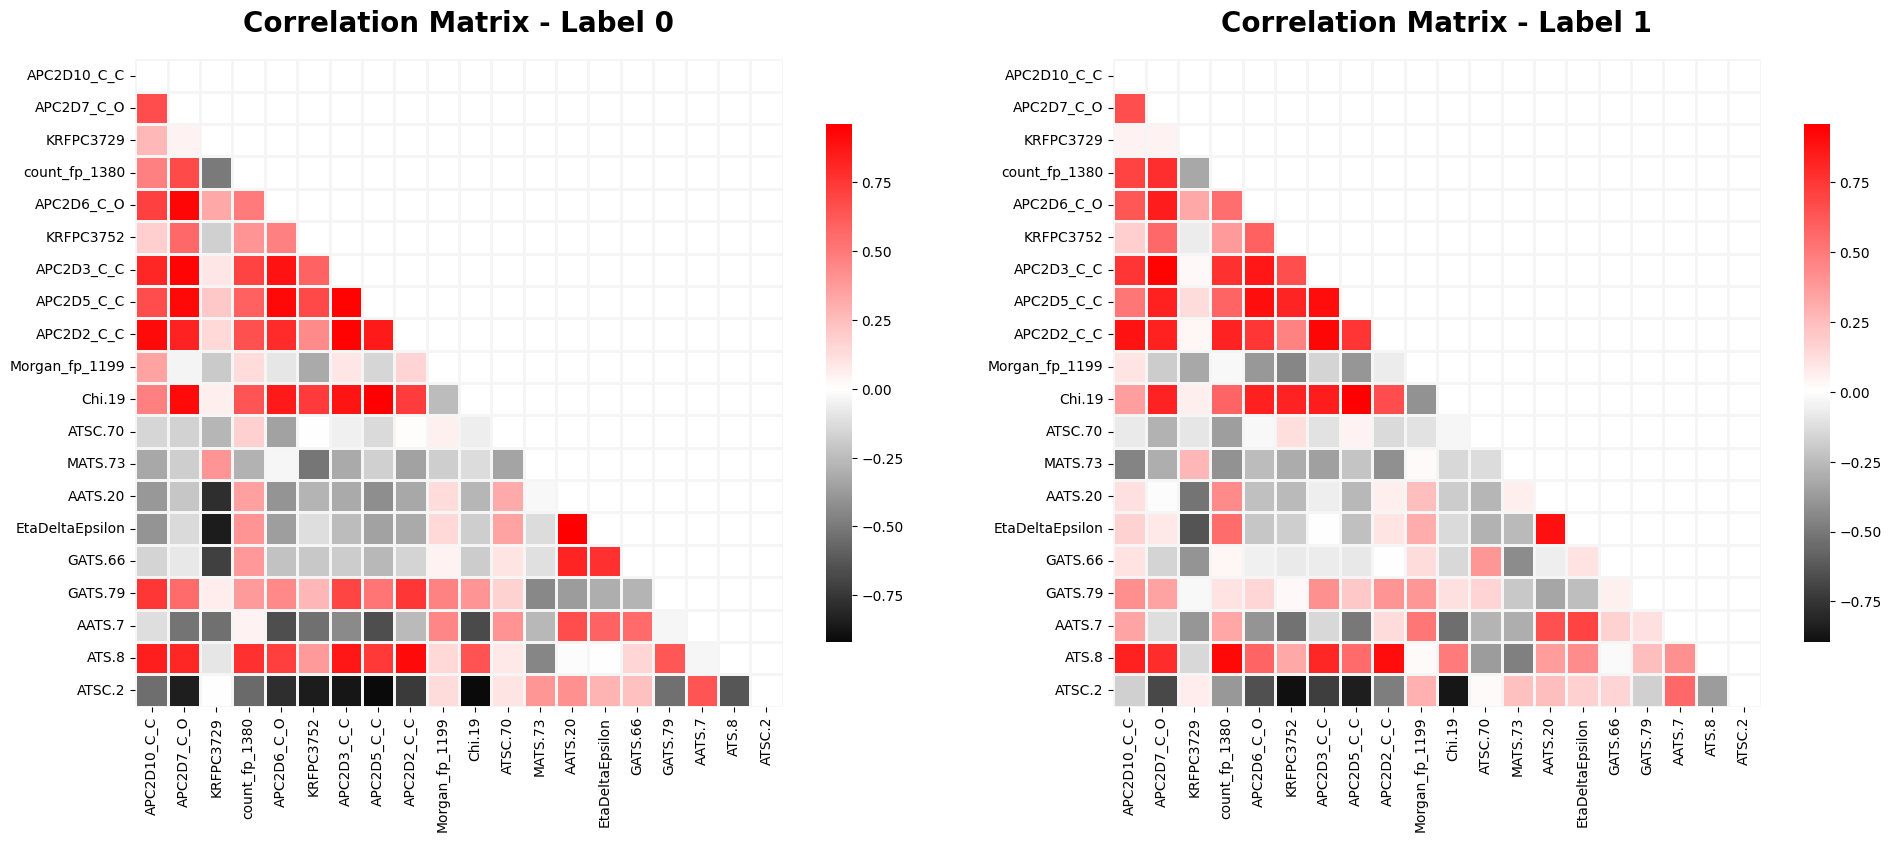

In [24]:

correlation_heatmaps_diff_labels(combined_train_df_labeled, label_col='Label', feature_cols=feature_cols_train)

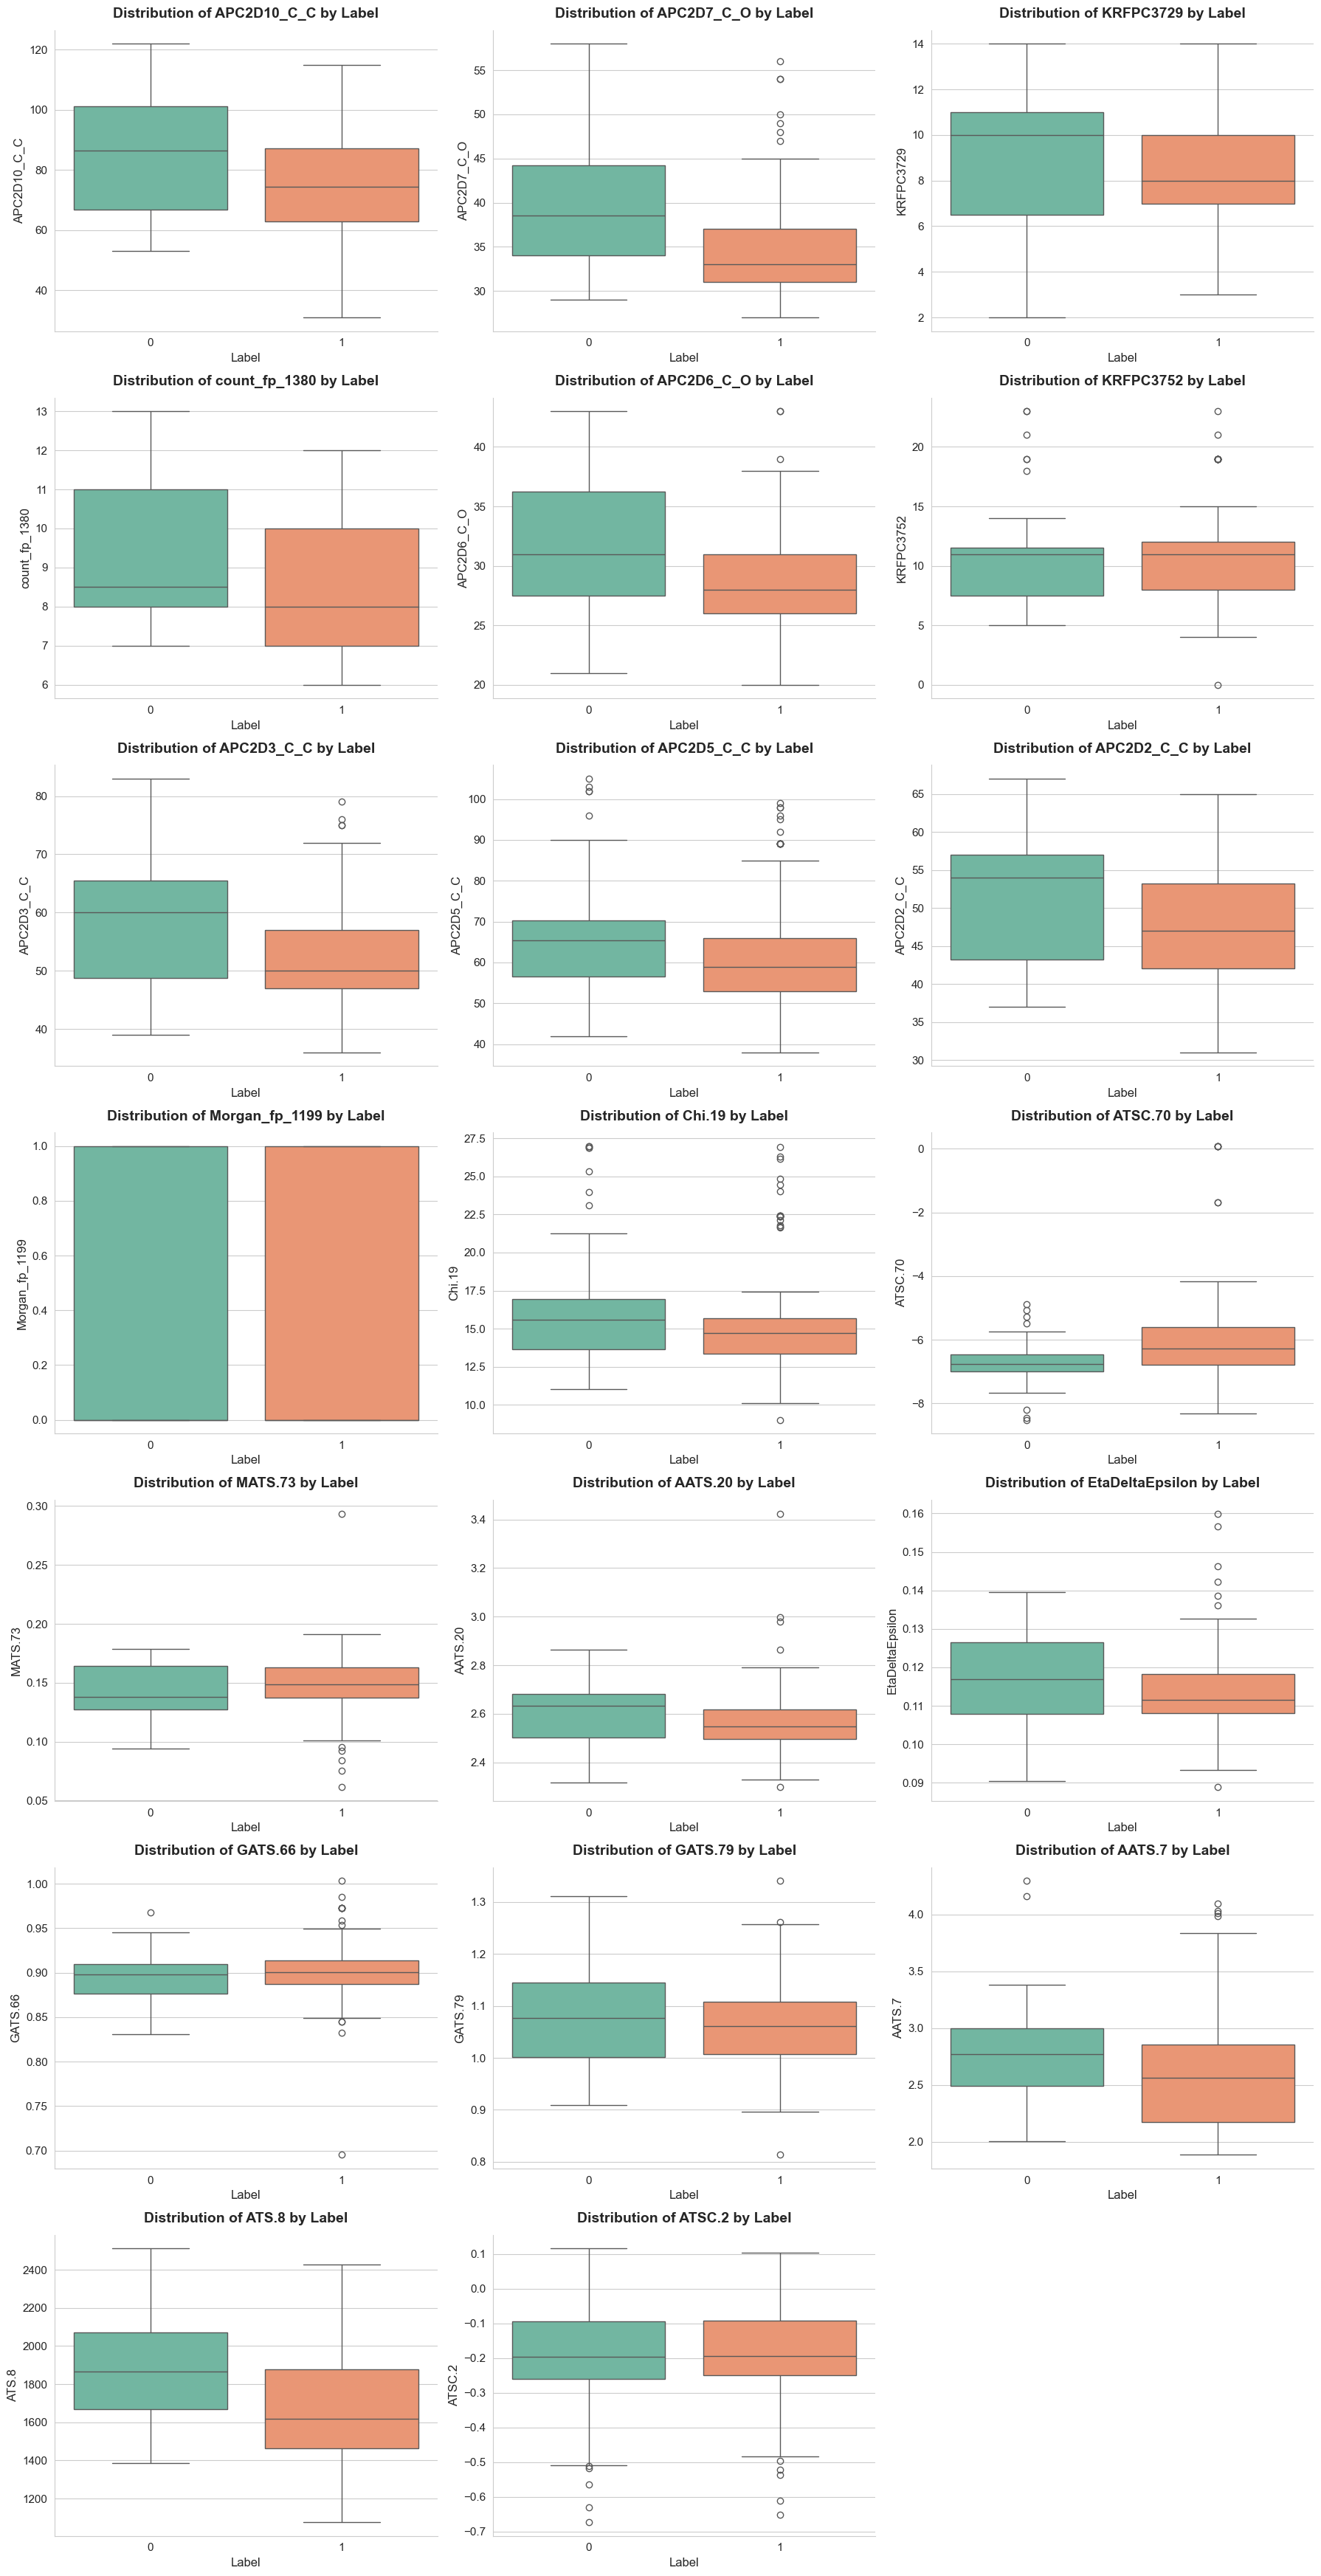

In [25]:
boxplots_diff_labels(combined_train_df_labeled, feature_cols_train, label_col='Label')


Top Features Correlation with Permeability by Label:

        Feature  Corr_Label_0  Corr_Label_1
    APC2D10_C_C     -0.302452     -0.265263
     APC2D7_C_O     -0.279155     -0.305172
      KRFPC3729     -0.153224     -0.073362
  count_fp_1380     -0.165394     -0.335225
     APC2D6_C_O     -0.415107     -0.190704
      KRFPC3752     -0.360488      0.020287
     APC2D3_C_C     -0.387204     -0.209306
     APC2D5_C_C     -0.458449     -0.119264
     APC2D2_C_C     -0.378206     -0.294548
 Morgan_fp_1199     -0.034797      0.301081
         Chi.19     -0.398808     -0.116724
        ATSC.70      0.029673      0.232447
        MATS.73      0.135163      0.057788
        AATS.20      0.264375     -0.226182
EtaDeltaEpsilon      0.248113     -0.160828
        GATS.66      0.125054      0.195672
        GATS.79     -0.092045      0.021666
         AATS.7      0.381352     -0.209160
          ATS.8     -0.251571     -0.349243
         ATSC.2      0.449919     -0.067139


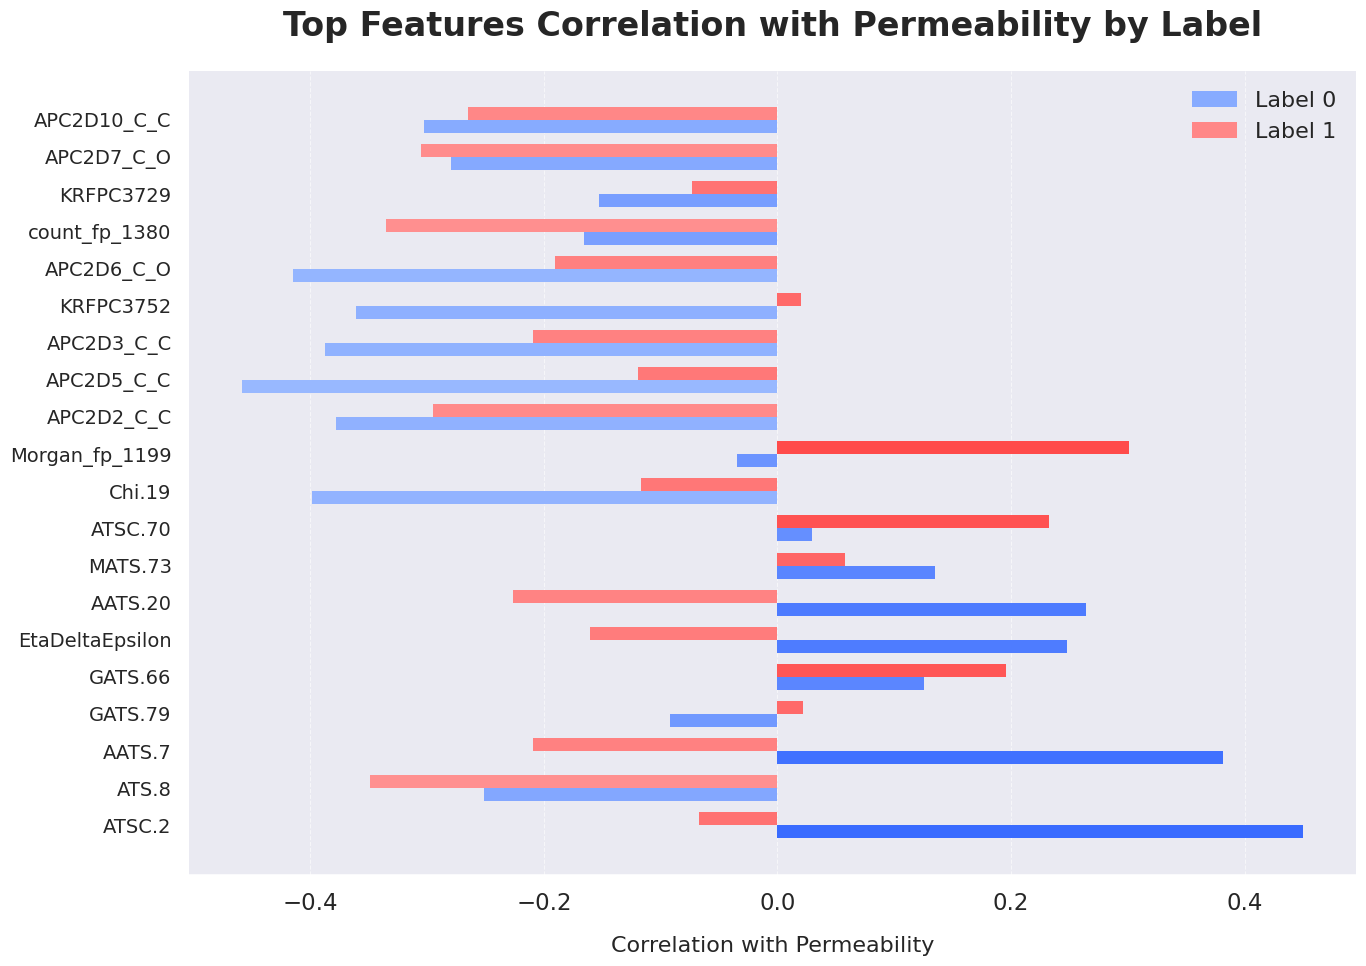

In [26]:
lgb_top_features_list = lgb_top_features['Feature'].to_list()
xgb_top_features_list = xgb_top_features['Feature'].to_list()
corr_df = plot_top_feature_correlations(
    combined_train_df_labeled,
    label_col='Label',
    permeability_col='Permeability',
    top_desc_features=lgb_top_features_list,
    top_fingerprint_features=xgb_top_features_list
)

In [27]:
ttest_df_train = ttest_feature_tests(combined_train_df_labeled, label_col='Label', feature_cols=feature_cols_train)
print(ttest_df_train)

Feature: APC2D10_C_C
T-Statistic: 2.9555, P-Value: 0.0046
Result: Reject the null hypothesis - significant difference between the two groups.

Feature: APC2D7_C_O
T-Statistic: 3.2159, P-Value: 0.0023
Result: Reject the null hypothesis - significant difference between the two groups.

Feature: KRFPC3729
T-Statistic: 0.3649, P-Value: 0.7169
Result: Fail to reject the null hypothesis - no significant difference between the two groups.

Feature: count_fp_1380
T-Statistic: 3.2700, P-Value: 0.0018
Result: Reject the null hypothesis - significant difference between the two groups.

Feature: APC2D6_C_O
T-Statistic: 2.6623, P-Value: 0.0104
Result: Reject the null hypothesis - significant difference between the two groups.

Feature: KRFPC3752
T-Statistic: 0.2657, P-Value: 0.7915
Result: Fail to reject the null hypothesis - no significant difference between the two groups.

Feature: APC2D3_C_C
T-Statistic: 2.4975, P-Value: 0.0158
Result: Reject the null hypothesis - significant difference between

In [28]:
anova_df_train = anova_feature_tests(combined_train_df_labeled, label_col='Label', feature_cols=feature_cols_train)
print(anova_df_train)

Feature: APC2D10_C_C
F-Statistic: 10.0315, P-Value: 0.0019
Result: Reject the null hypothesis - significant difference between the two groups.

Feature: APC2D7_C_O
F-Statistic: 13.7164, P-Value: 0.0003
Result: Reject the null hypothesis - significant difference between the two groups.

Feature: KRFPC3729
F-Statistic: 0.1971, P-Value: 0.6578
Result: Fail to reject the null hypothesis - no significant difference between the two groups.

Feature: count_fp_1380
F-Statistic: 10.7126, P-Value: 0.0013
Result: Reject the null hypothesis - significant difference between the two groups.

Feature: APC2D6_C_O
F-Statistic: 8.9877, P-Value: 0.0032
Result: Reject the null hypothesis - significant difference between the two groups.

Feature: KRFPC3752
F-Statistic: 0.0862, P-Value: 0.7696
Result: Fail to reject the null hypothesis - no significant difference between the two groups.

Feature: APC2D3_C_C
F-Statistic: 7.9471, P-Value: 0.0055
Result: Reject the null hypothesis - significant difference betw

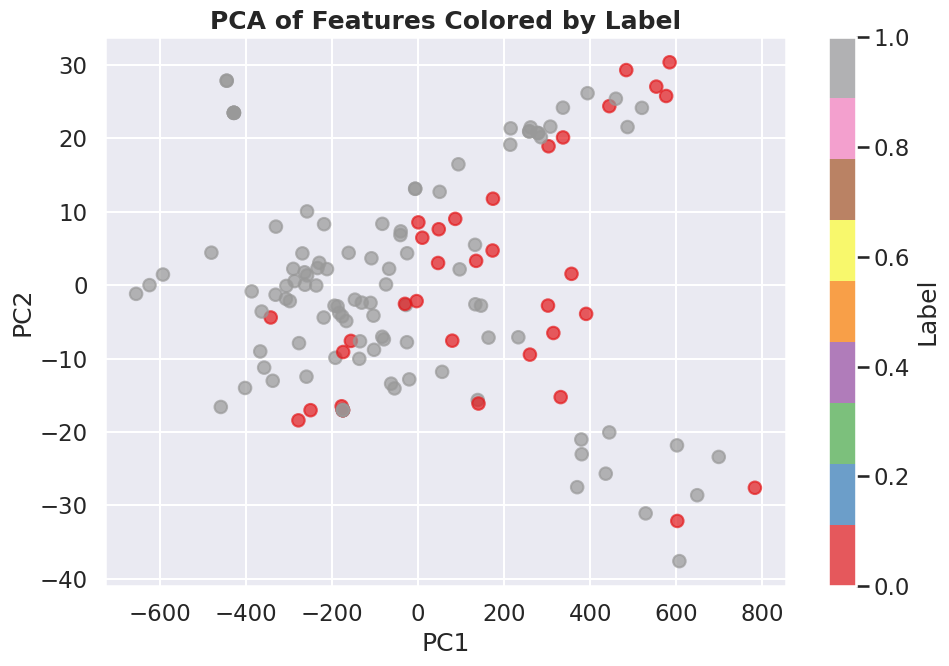

In [29]:

pca_visualization(combined_train_df_labeled, label_col='Label', feature_cols=feature_cols_train)

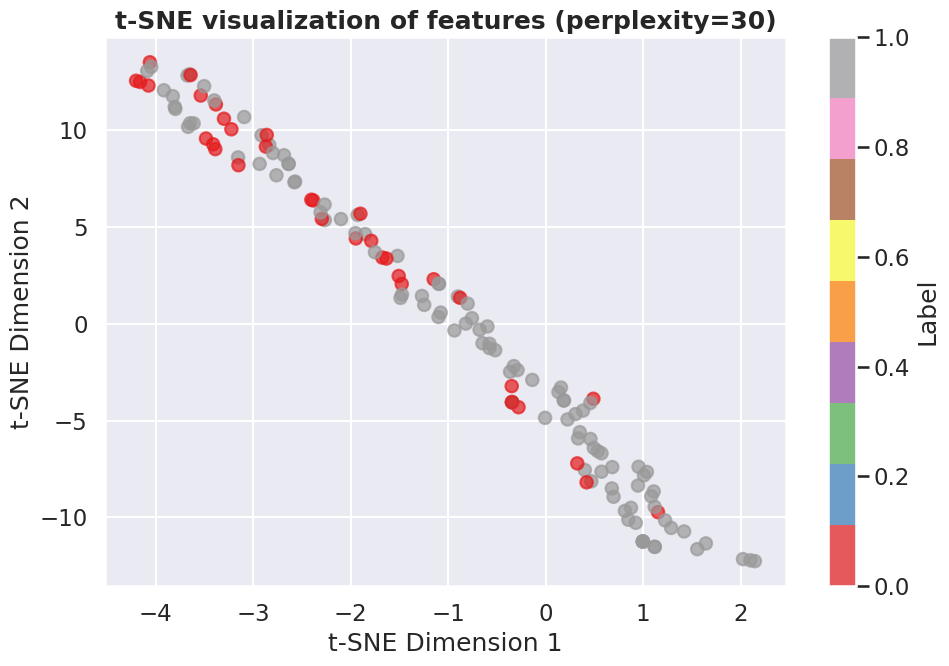

In [30]:
tsne_visualization(combined_train_df_labeled, label_col='Label', feature_cols=feature_cols_train, perplexity=30)

In [31]:
feature_cols_test = [col for col in combined_test_df_labeled.columns if col not in ['ID', 'SMILES', 'Permeability', 'Label']]

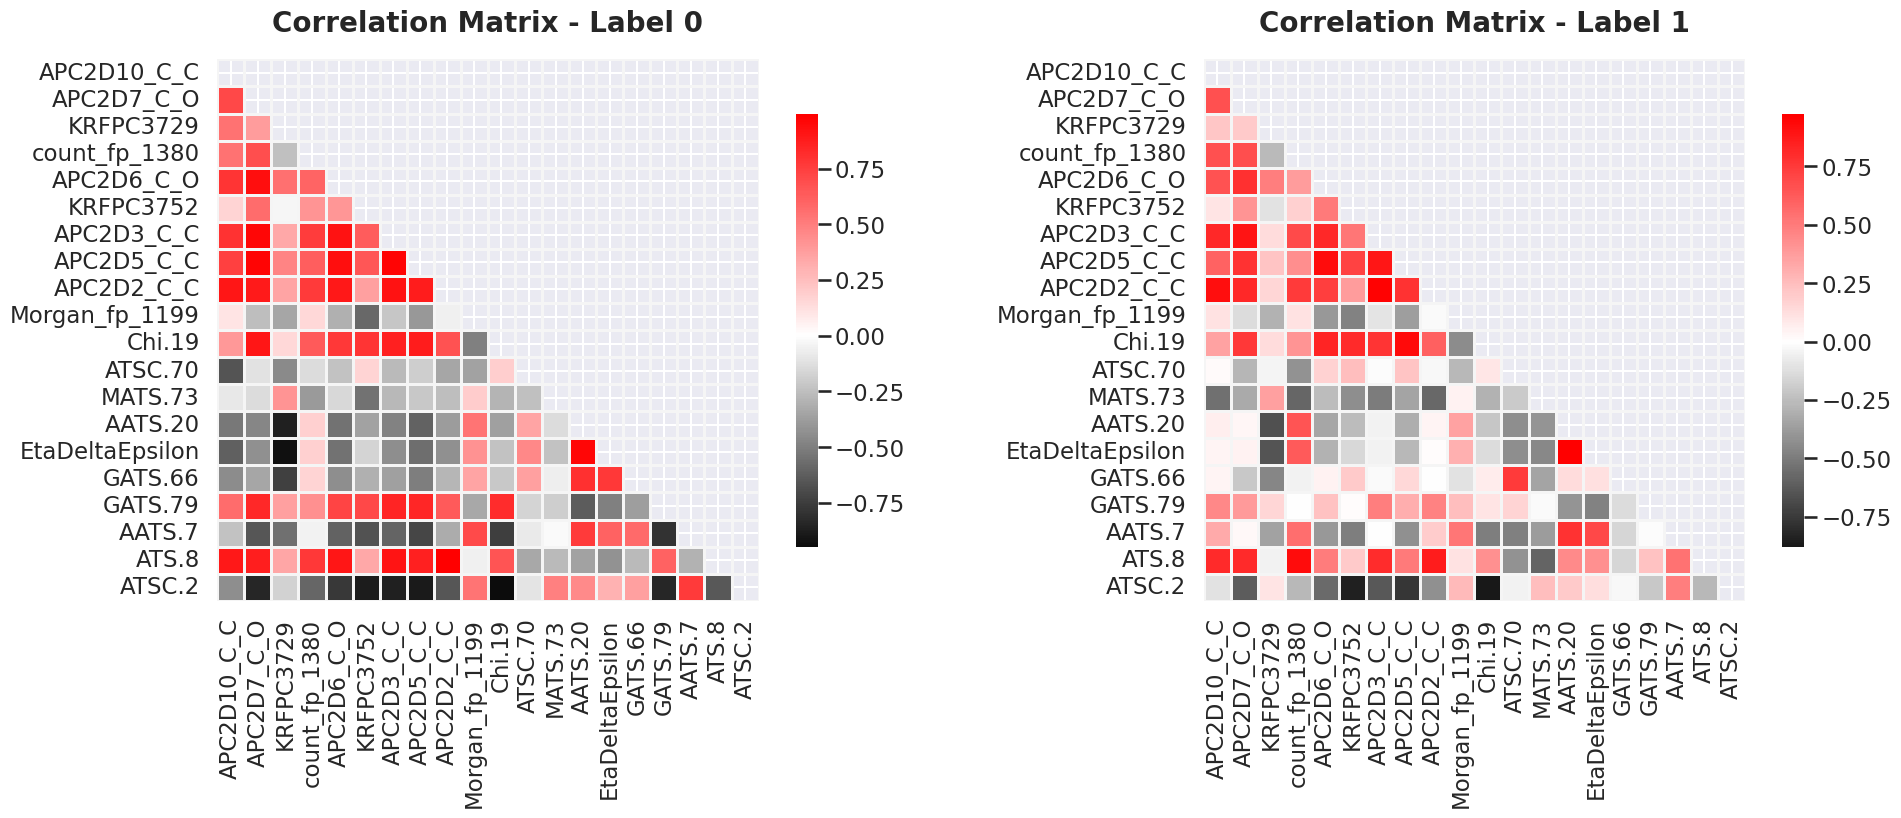

In [32]:
correlation_heatmaps_diff_labels(combined_test_df_labeled, label_col='Label', feature_cols=feature_cols_test)

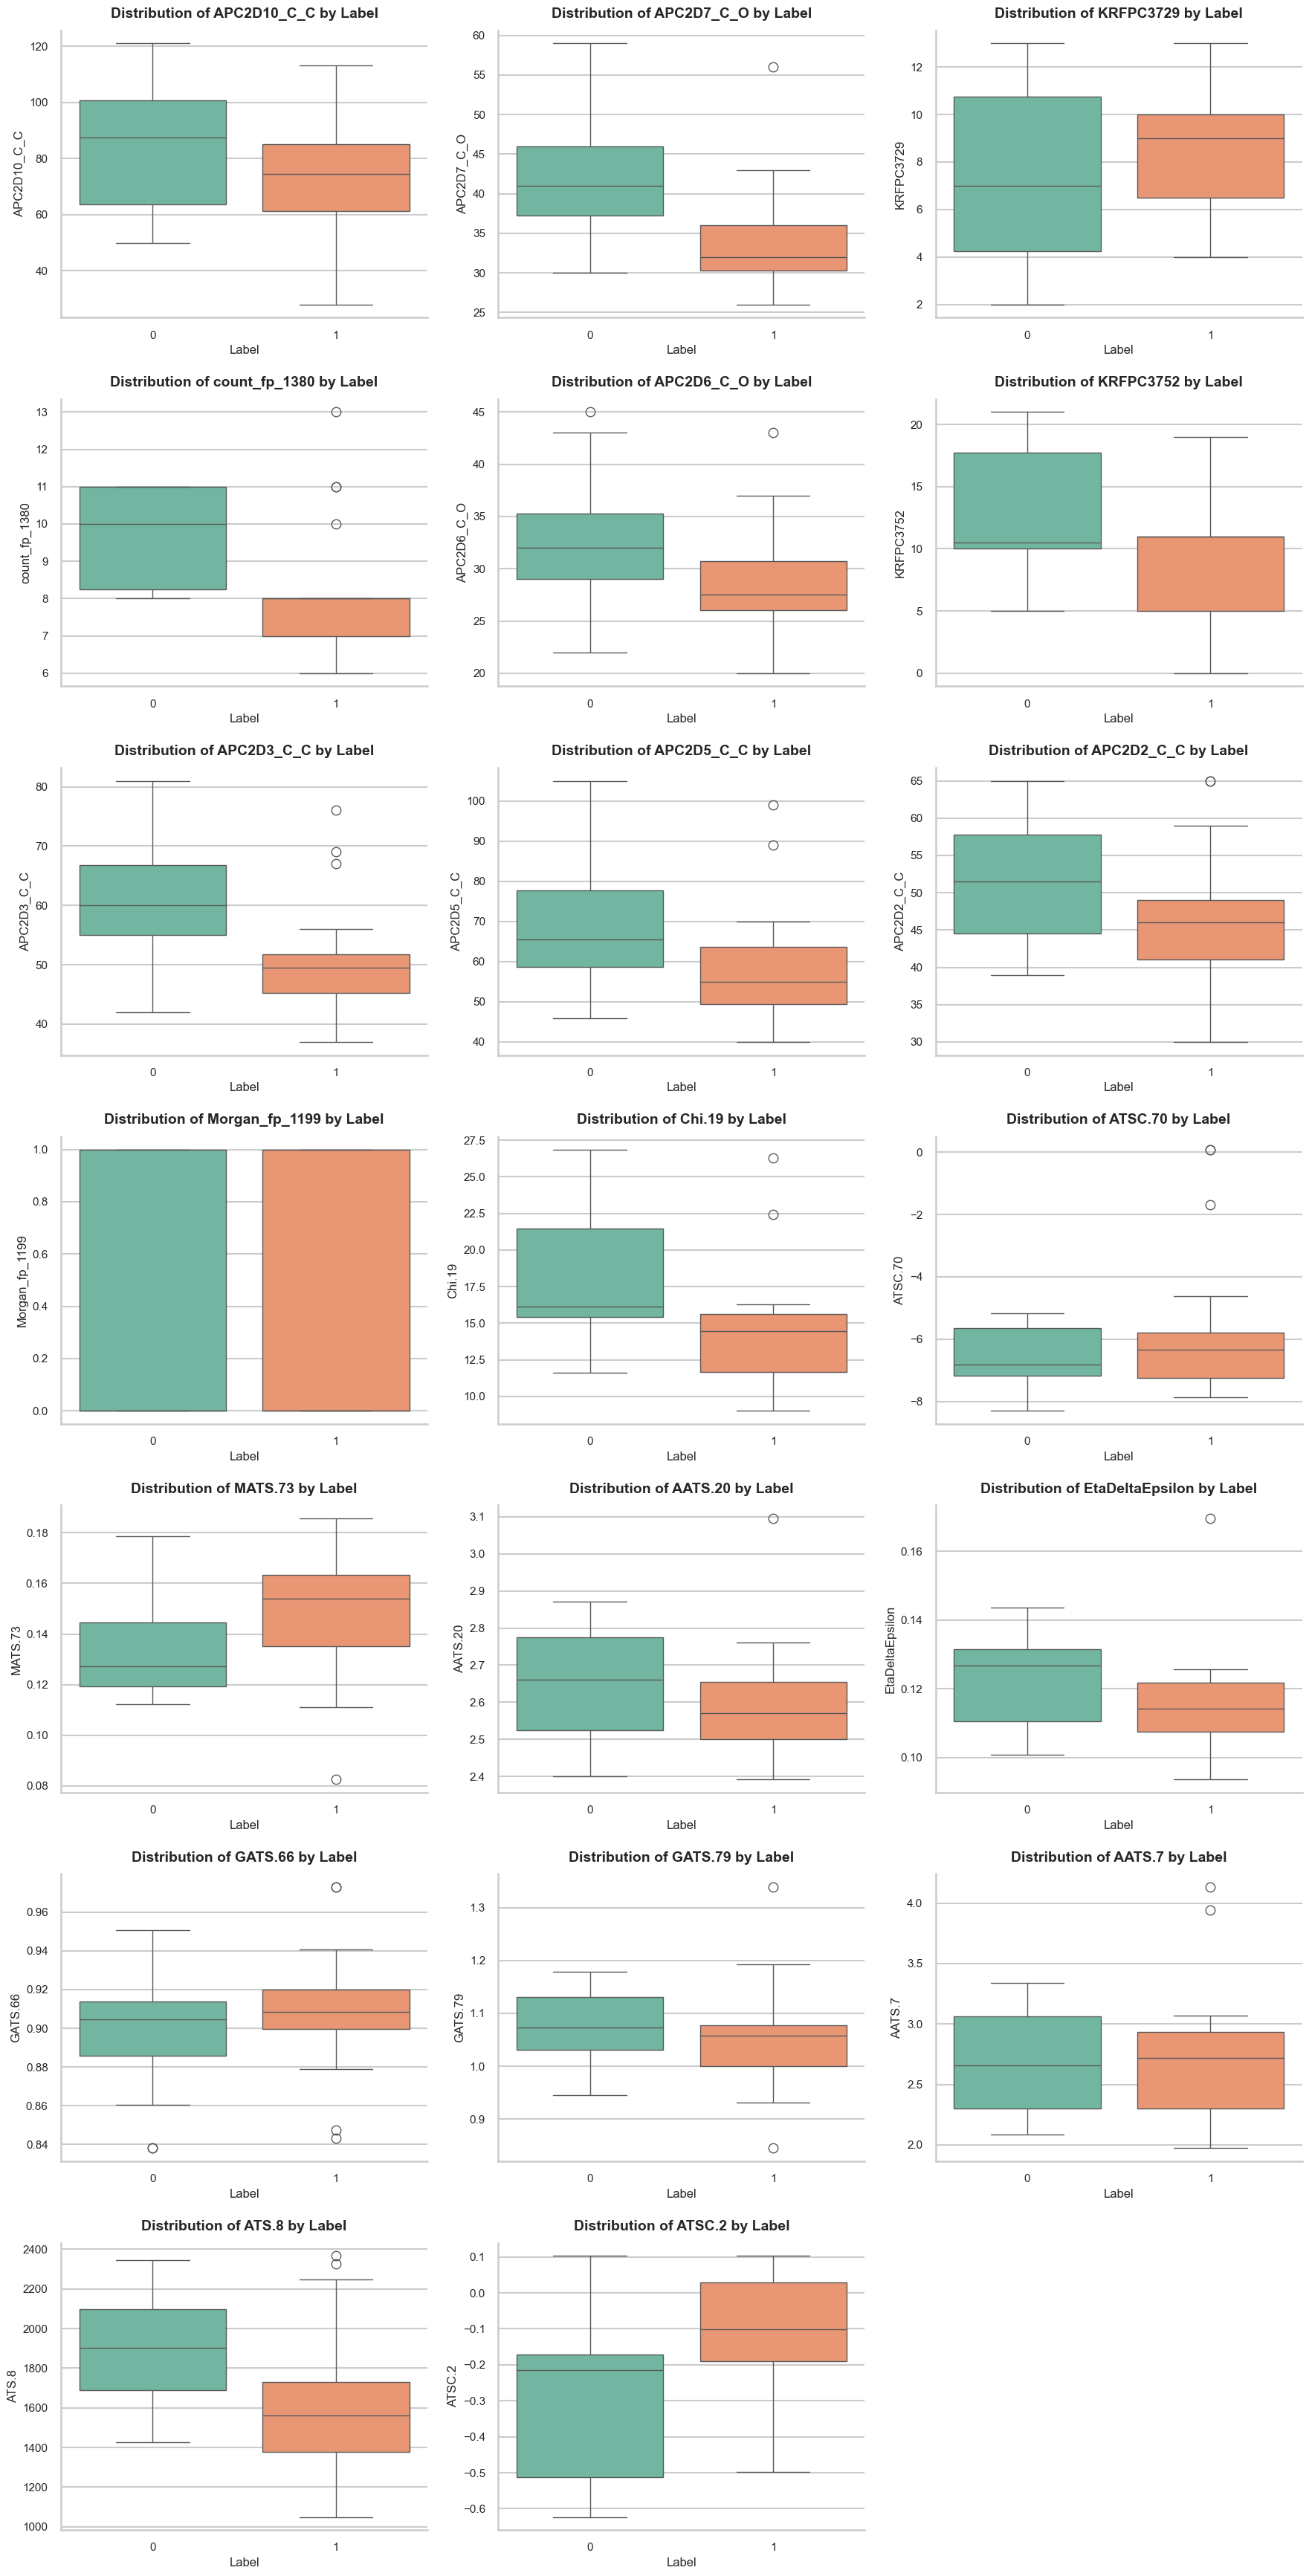

In [33]:
boxplots_diff_labels(combined_test_df_labeled, feature_cols_test, label_col='Label')


Top Features Correlation with Permeability by Label:

        Feature  Corr_Label_0  Corr_Label_1
    APC2D10_C_C     -0.333767     -0.218418
     APC2D7_C_O     -0.509945     -0.145208
      KRFPC3729     -0.118315     -0.170848
  count_fp_1380     -0.468489      0.019129
     APC2D6_C_O     -0.441417     -0.103635
      KRFPC3752     -0.779759      0.398559
     APC2D3_C_C     -0.631369     -0.022703
     APC2D5_C_C     -0.613821      0.073299
     APC2D2_C_C     -0.401550     -0.074756
 Morgan_fp_1199      0.394656      0.233283
         Chi.19     -0.615382      0.183863
        ATSC.70      0.284158     -0.179627
        MATS.73      0.265681     -0.025169
        AATS.20      0.369959     -0.028124
EtaDeltaEpsilon      0.240247      0.032382
        GATS.66      0.384638     -0.169178
        GATS.79     -0.649199     -0.227430
         AATS.7      0.537549     -0.166474
          ATS.8     -0.373116     -0.105549
         ATSC.2      0.707110     -0.378865


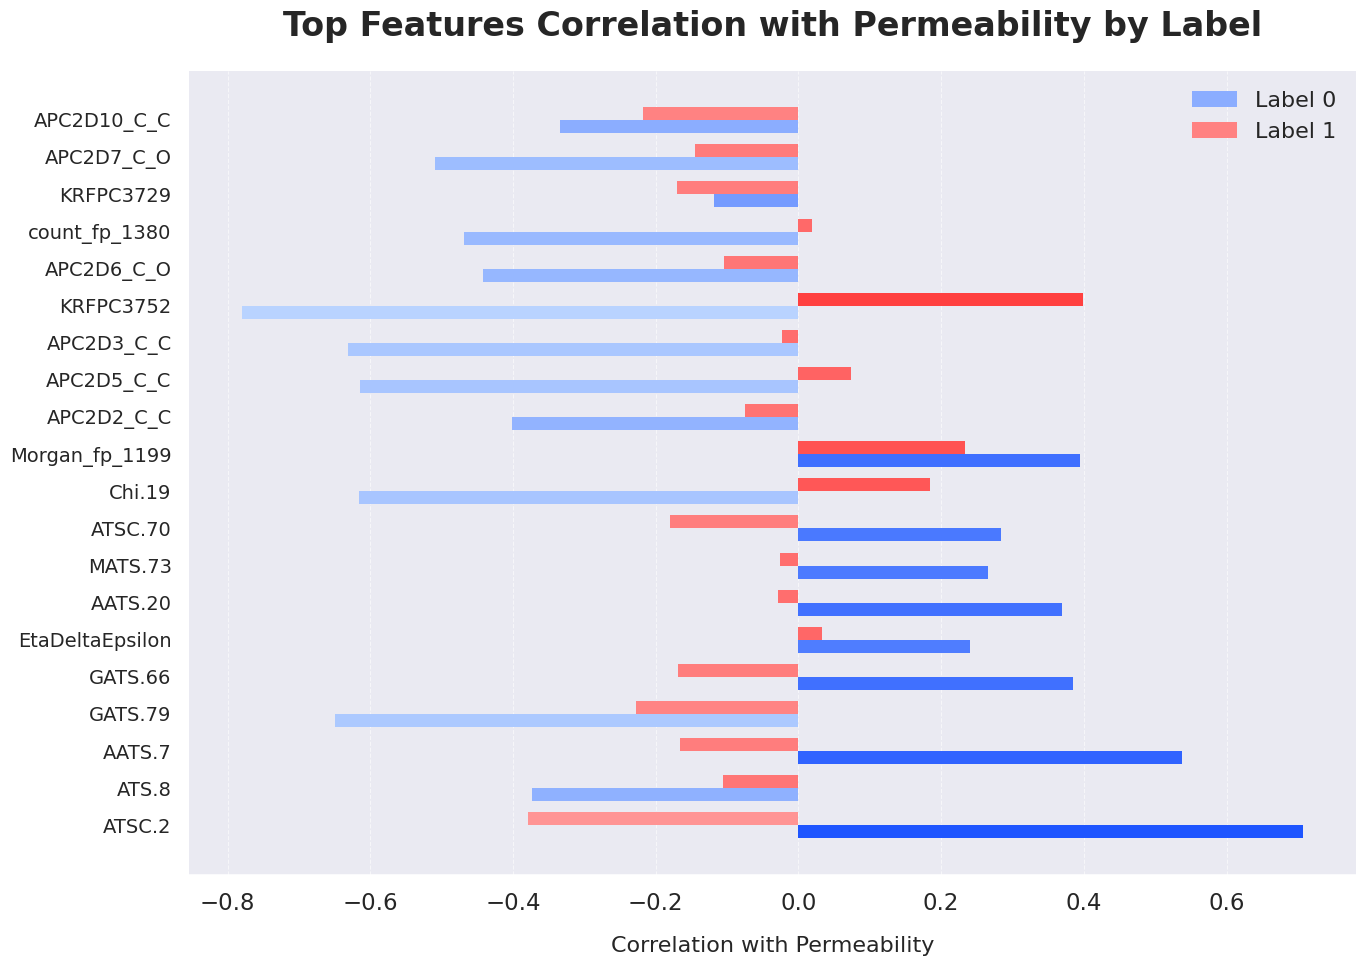

In [34]:
lgb_top_features_list = lgb_top_features['Feature'].to_list()
xgb_top_features_list = xgb_top_features['Feature'].to_list()
corr_df = plot_top_feature_correlations(
    combined_test_df_labeled,
    label_col='Label',
    permeability_col='Permeability',
    top_desc_features=lgb_top_features_list,
    top_fingerprint_features=xgb_top_features_list
)

In [35]:
ttest_df_test = ttest_feature_tests(combined_test_df_labeled, label_col='Label', feature_cols=feature_cols_test)
print(ttest_df_test)

Feature: APC2D10_C_C
T-Statistic: 1.5135, P-Value: 0.1423
Result: Fail to reject the null hypothesis - no significant difference between the two groups.

Feature: APC2D7_C_O
T-Statistic: 3.2303, P-Value: 0.0036
Result: Reject the null hypothesis - significant difference between the two groups.

Feature: KRFPC3729
T-Statistic: -1.1096, P-Value: 0.2801
Result: Fail to reject the null hypothesis - no significant difference between the two groups.

Feature: count_fp_1380
T-Statistic: 3.4643, P-Value: 0.0015
Result: Reject the null hypothesis - significant difference between the two groups.

Feature: APC2D6_C_O
T-Statistic: 2.2719, P-Value: 0.0327
Result: Reject the null hypothesis - significant difference between the two groups.

Feature: KRFPC3752
T-Statistic: 2.1659, P-Value: 0.0409
Result: Reject the null hypothesis - significant difference between the two groups.

Feature: APC2D3_C_C
T-Statistic: 2.7036, P-Value: 0.0122
Result: Reject the null hypothesis - significant difference betwee

In [36]:
anova_df_test = anova_feature_tests(combined_test_df_labeled, label_col='Label', feature_cols=feature_cols_test)
print(anova_df_test)

Feature: APC2D10_C_C
F-Statistic: 2.4004, P-Value: 0.1306
Result: Fail to reject the null hypothesis - no significant difference between the two groups.

Feature: APC2D7_C_O
F-Statistic: 11.4584, P-Value: 0.0018
Result: Reject the null hypothesis - significant difference between the two groups.

Feature: KRFPC3729
F-Statistic: 1.4728, P-Value: 0.2333
Result: Fail to reject the null hypothesis - no significant difference between the two groups.

Feature: count_fp_1380
F-Statistic: 10.4981, P-Value: 0.0027
Result: Reject the null hypothesis - significant difference between the two groups.

Feature: APC2D6_C_O
F-Statistic: 5.7257, P-Value: 0.0224
Result: Reject the null hypothesis - significant difference between the two groups.

Feature: KRFPC3752
F-Statistic: 5.2355, P-Value: 0.0285
Result: Reject the null hypothesis - significant difference between the two groups.

Feature: APC2D3_C_C
F-Statistic: 7.8425, P-Value: 0.0084
Result: Reject the null hypothesis - significant difference betwe

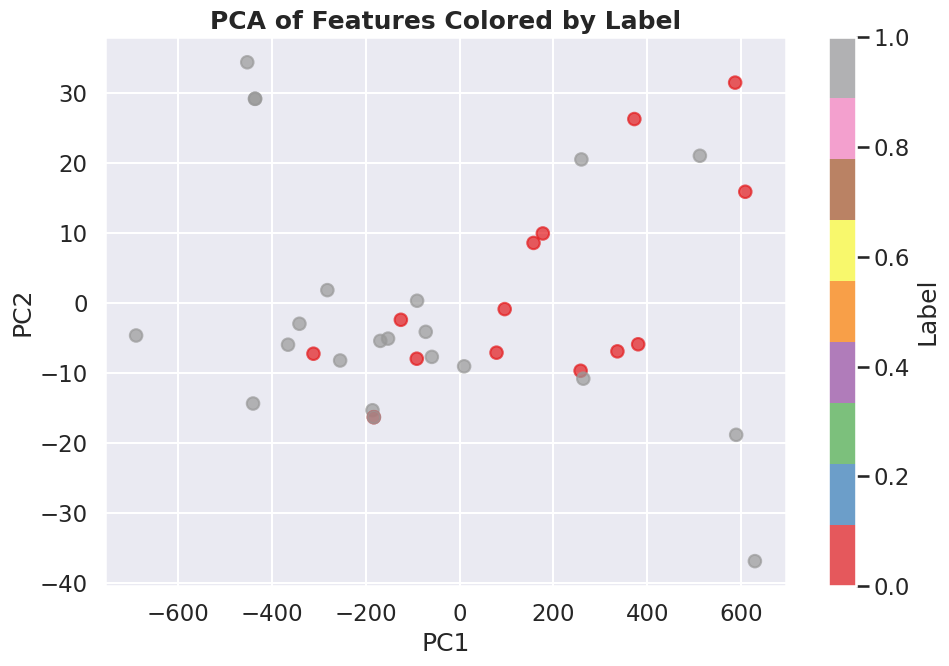

In [37]:
pca_visualization(combined_test_df_labeled, label_col='Label', feature_cols=feature_cols_test)

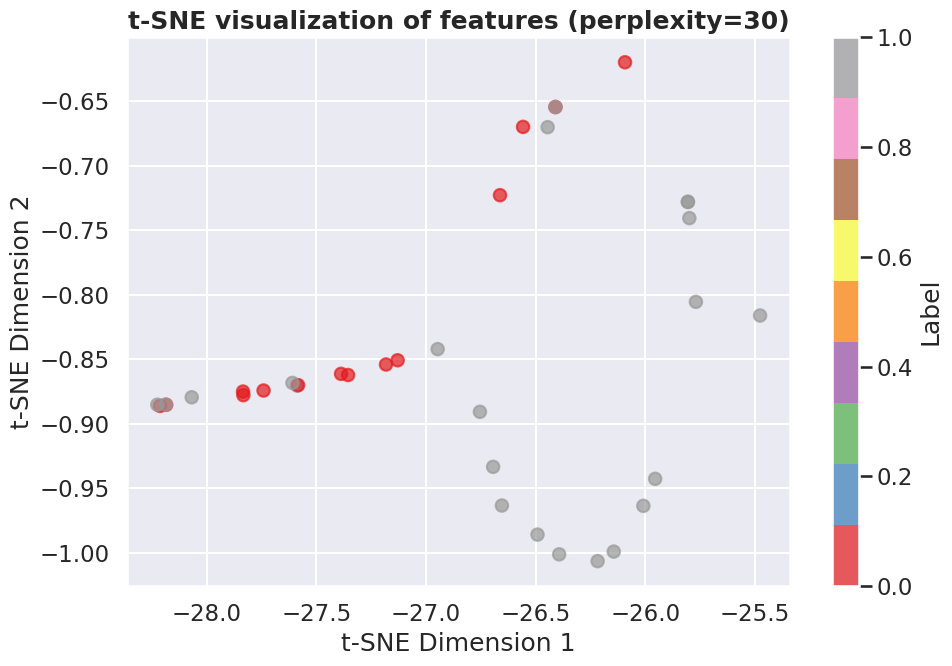

In [38]:
tsne_visualization(combined_test_df_labeled, label_col='Label', feature_cols=feature_cols_test, perplexity=30)